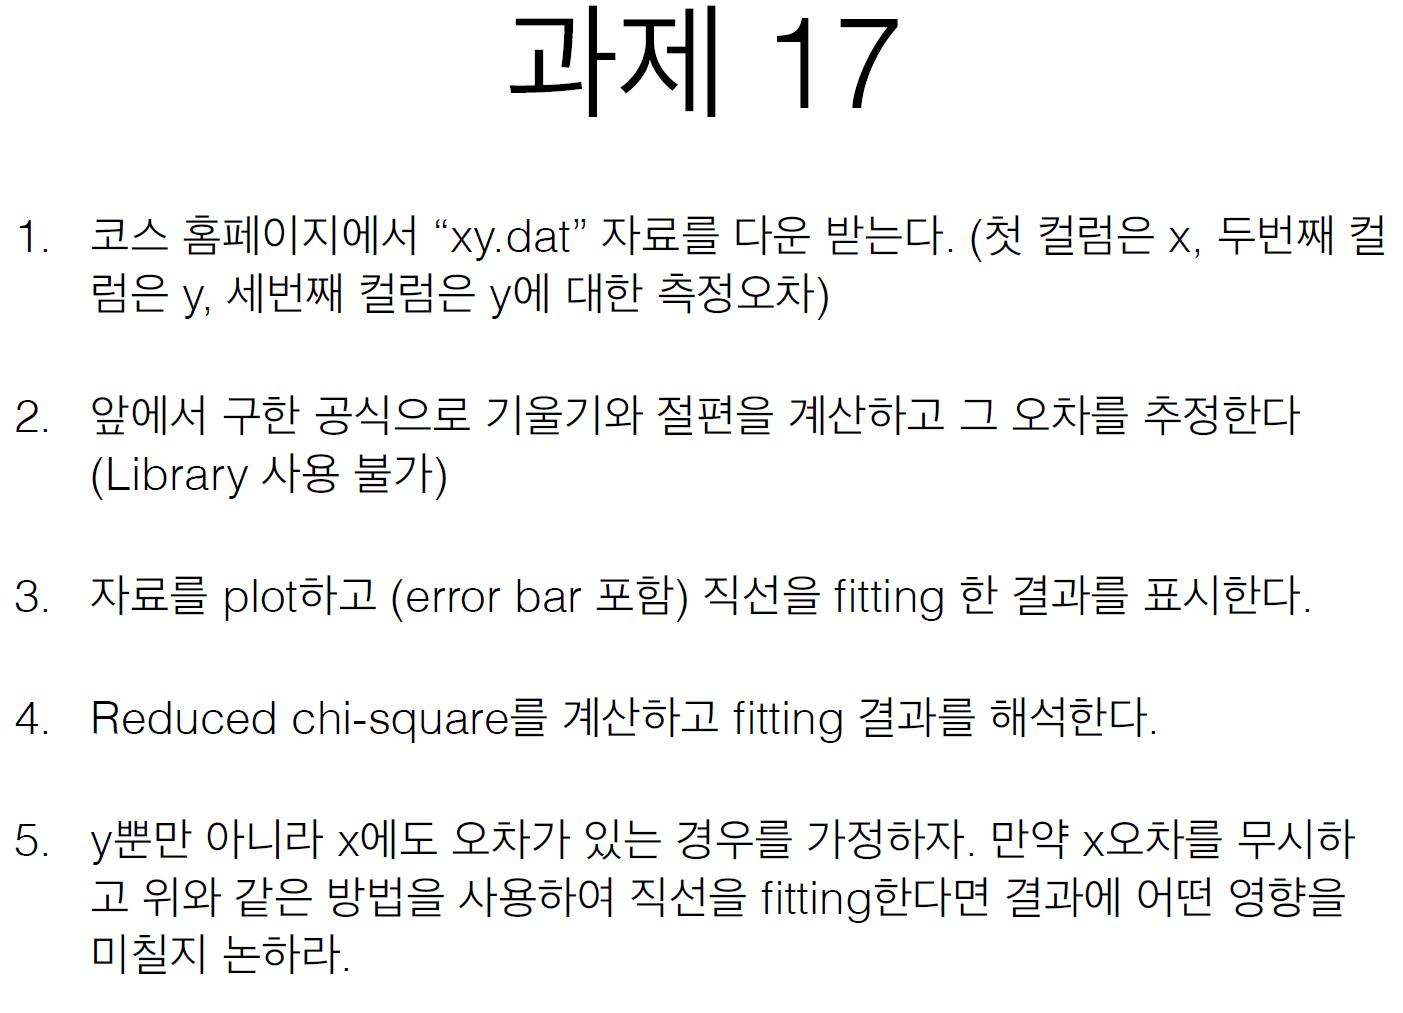

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv('xy.dat', sep=r'\s+', names=['x','y', 'err_y'])
print(data.shape)
print(data.describe())

(14, 3)
               x          y      err_y
count  14.000000  14.000000  14.000000
mean    6.864286  13.947857   2.005000
std     3.563621   7.761888   0.813783
min     2.000000   4.280000   0.990000
25%     3.875000   6.077500   1.305000
50%     6.750000  13.040000   2.000000
75%     9.275000  20.235000   2.702500
max    12.800000  25.890000   3.220000


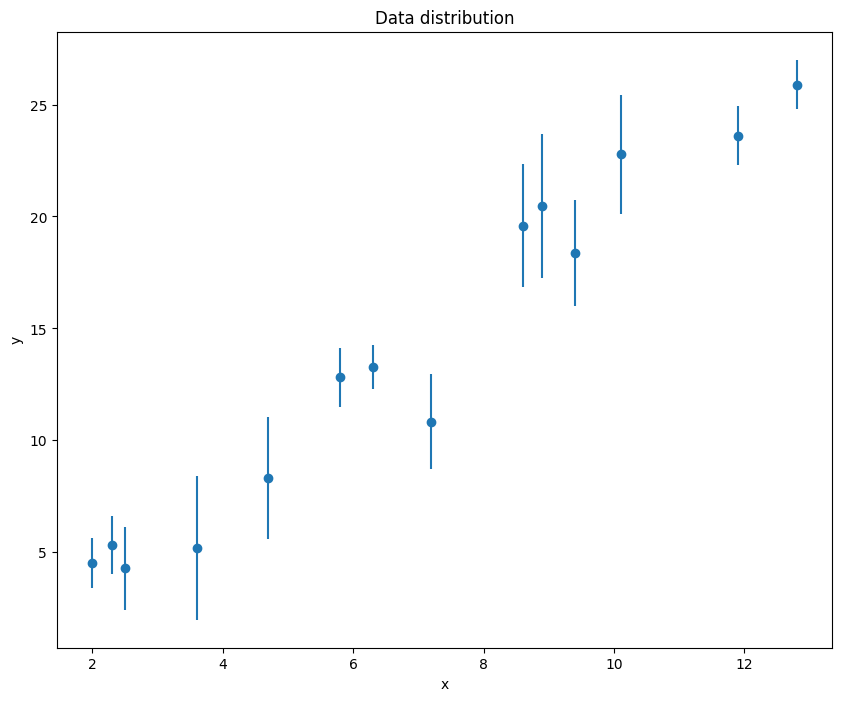

In [4]:
plt.figure(figsize=(10, 8))
plt.title("Data distribution")
plt.xlabel('x')
plt.ylabel('y')
plt.errorbar(data['x'], data['y'], data['err_y'], fmt='o')
plt.show()

In [5]:
def LLS(x, y, err):
    err = 1/err**2
    S = np.sum(err)
    S_x = np.sum(x * err)
    S_y = np.sum(y * err)
    S_xx = np.sum(x**2 * err)
    S_xy = np.sum(x * y * err)
    
    grad = S * S_xx - S_x**2
    
    a = (S_xx * S_y - S_x * S_xy) / grad
    b = (S * S_xy - S_x * S_y) / grad
    
    return b * x + a, S / grad, S_xx / grad
    
def Chi_Square(y, y_fit, err):
    N = len(y) - 3
    result = np.sum(((y - y_fit)/err)**2)
    
    return result/N

In [6]:
LLS_result, error_y, error_x = LLS(data['x'], data['y'], data['err_y'])
CS = Chi_Square(data['y'], LLS_result, data['err_y'])

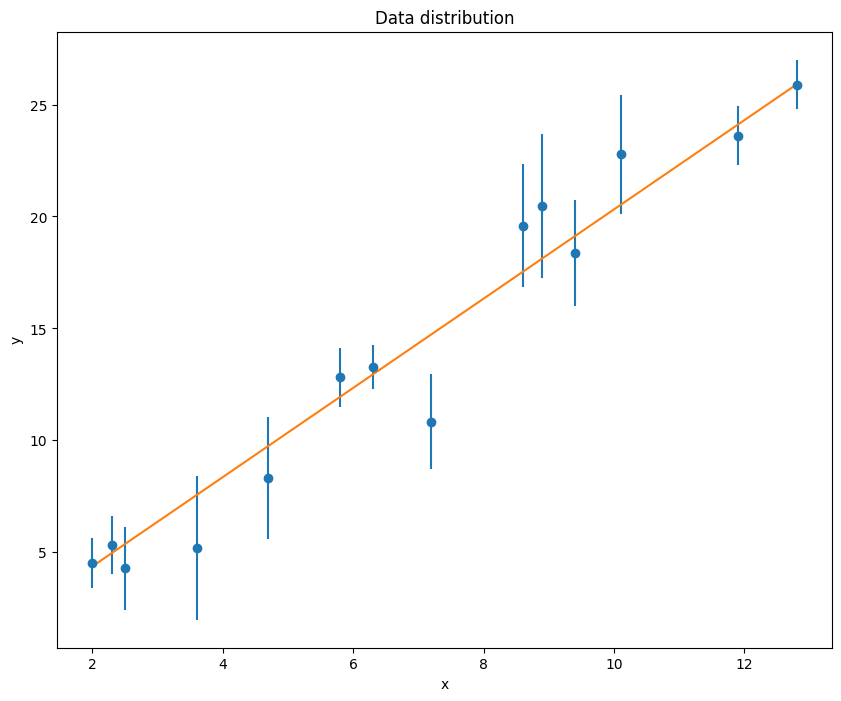

0.6547372990736023


In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Fitted line")
plt.xlabel('x')
plt.ylabel('y')
plt.errorbar(data['x'], data['y'], data['err_y'], fmt='o')
plt.plot(data['x'], LLS_result)
plt.show()
print(CS)

In [21]:
seed = np.random.randint(0, 10)
print("seed value for err: " + str(seed))
np.random.seed(seed)
data['err_x'] = np.abs(np.random.normal(0, 0.2, size=len(data)))

LLS_err_x, error_x_y, error_x_x = LLS(data['x'], data['y'], data['err_y'])
CS2 = Chi_Square(data['y'], LLS_err_x, data['err_y'])

seed value for err: 6


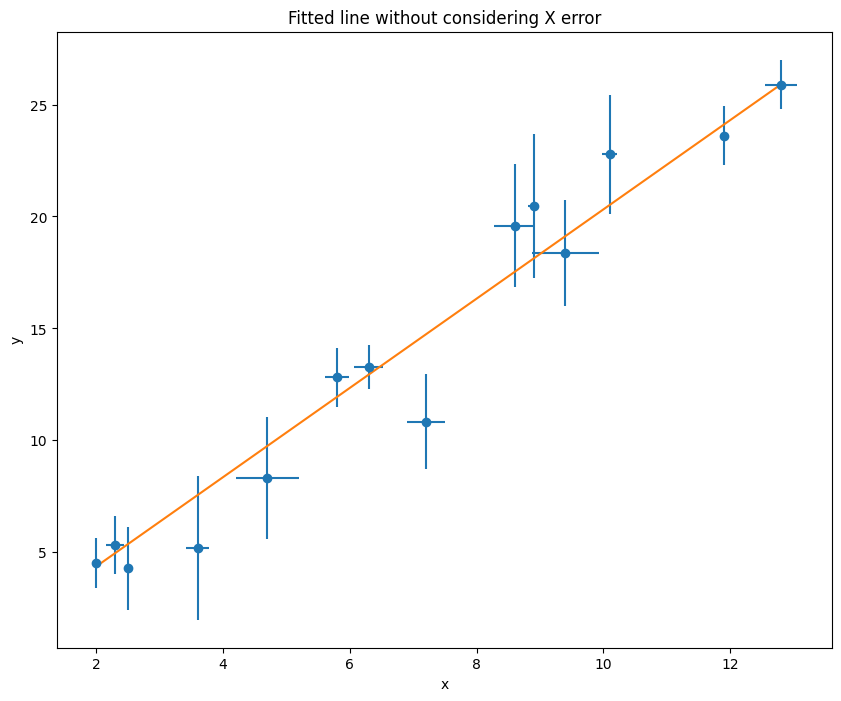

0.6547372990736023


In [23]:
plt.figure(figsize=(10, 8))
plt.title("Fitted line without considering X error")
plt.xlabel('x')
plt.ylabel('y')
plt.errorbar(data['x'], data['y'], data['err_y'], data['err_x'], fmt='o')
plt.plot(data['x'], LLS_err_x)
plt.show()
print(CS2)